# Text Mining 2

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import string
import re
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Only do this once.  Details at https://www.nltk.org/data.html
# nltk.download('wordnet')
# nltk.download('stopwords')

# Alternative method
# nltk.download()
# Use default Download directory
#    -> select Corpora tab -> scroll to Stopwords Corpus -> click Download
#    -> select Corpora tab -> scroll to WordNet -> click Download

## Part 1

### Load data

In [3]:
# Read raw text
RawText = open("data/SMS_spam.tsv").read()

# Display first 500 characters of raw text
RawText[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [4]:
pd.set_option('max_colwidth',200)

In [5]:
# Read tab-separated-values file into dataframe
df = pd.read_csv('data/SMS_spam.tsv', sep='\t', names=['label', 'body_text'], header=None)
df.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


### Review data

In [6]:
# Review shape of the dataset
print("Input data has {} rows and {} columns".format(len(df), len(df.columns)))

Input data has 5568 rows and 2 columns


In [7]:
# Review distribution of labels
print("Out of {} rows, {} are spam, {} are ham". \
      format(len(df), len(df[df['label']=='spam']), len(df[df['label']=='ham'])))

Out of 5568 rows, 746 are spam, 4822 are ham


In [8]:
# Check for missing values
df.isna().sum()

label        0
body_text    0
dtype: int64

### Preprocess data

#### Remove punctuation

In [9]:
# Display punctuation symbols
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
# Create function to remove punctuation
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

# Remove punctuation from data
df['body_text_clean'] = df['body_text'].apply(lambda x: remove_punct(x))
df.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,Ive been searching for the right words to thank you for this breather I promise i wont take your help for granted and will fulfil my promise You have been wonderful and a blessing at all times
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


#### Tokenize and lowercase data

In [11]:
# Create function to tokenize and lowercase data
def tokenize(text):
    # W+ means that either a word character (A-Za-z0-9_) or a dash (-) can go there.
    tokens = re.split('\W+', text)
    return tokens

# Tokenize and lowercase data 
df['body_text_tokenized'] = df['body_text_clean'].apply(lambda x: tokenize(x.lower())) 
df.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,Ive been searching for the right words to thank you for this breather I promise i wont take your help for granted and will fulfil my promise You have been wonderful and a blessing at all times,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, i, wont, take, your, help, for, granted, and, will, fulfil, my, promise, you, have, been, wonderful,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


#### Remove stopwords

In [12]:
# Define stop words list
stopwords = nltk.corpus.stopwords.words('english')     # All English Stopwords
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
# Create function to remove stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

# Remove stop words from data
df['body_text_nostop'] = df['body_text_tokenized'].apply(lambda x: remove_stopwords(x))
df.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,Ive been searching for the right words to thank you for this breather I promise i wont take your help for granted and will fulfil my promise You have been wonderful and a blessing at all times,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, i, wont, take, your, help, for, granted, and, will, fulfil, my, promise, you, have, been, wonderful,...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, times]"
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


#### Apply stemming

In [14]:
ps = nltk.PorterStemmer()

# Create function to apply stemmer
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

# Apply Porter Stemmer
df['body_text_stemmed'] = df['body_text_nostop'].apply(lambda x: stemming(x))
df.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,Ive been searching for the right words to thank you for this breather I promise i wont take your help for granted and will fulfil my promise You have been wonderful and a blessing at all times,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, i, wont, take, your, help, for, granted, and, will, fulfil, my, promise, you, have, been, wonderful,...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, times]","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, wonder, bless, time]"
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]"
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


#### Apply a lemmatizer

In [15]:
wn = nltk.WordNetLemmatizer()

# Create function to apply lematizer
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

# Apply lemmatizer
df['body_text_lemmatized'] = df['body_text_nostop'].apply(lambda x: lemmatizing(x))
df.head(10)

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,Ive been searching for the right words to thank you for this breather I promise i wont take your help for granted and will fulfil my promise You have been wonderful and a blessing at all times,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, i, wont, take, your, help, for, granted, and, will, fulfil, my, promise, you, have, been, wonderful,...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, times]","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, wonder, bless, time]","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, time]"
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"
5,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,As per your request Melle Melle Oru Minnaminunginte Nurungu Vettam has been set as your callertune for all Callers Press 9 to copy your friends Callertune,"[as, per, your, request, melle, melle, oru, minnaminunginte, nurungu, vettam, has, been, set, as, your, callertune, for, all, callers, press, 9, to, copy, your, friends, callertune]","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, press, 9, copy, friends, callertune]","[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, 9, copi, friend, callertun]","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, press, 9, copy, friend, callertune]"
6,spam,WINNER!! As a valued network customer you have been selected to receivea 

In [16]:
#pd.reset_option('max_colwidth')

### Save cleaned data

In [17]:
# Save file as CSV because it's easier to read
df.to_csv("data/SMS_spam_cleaned.csv", sep=',')

## Part 2

### Define global variables

In [18]:
global TEST_SIZE, RANDOM_STATE, N_ESTIMATORS
TEST_SIZE = .3
RANDOM_STATE = 42
N_ESTIMATORS = 100

### Reload original data

In [19]:
# Load original data file into new dataframe
df2 = pd.read_csv("data/SMS_spam.tsv", sep='\t')
df2.columns = ['label', 'body_text']
df2.shape

(5567, 2)

In [20]:
df2.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


#### Create functions to lowercase, remove punctuation, tokenize, remove stopwords, and stem

In [21]:
# Function clean_text will be used in subsequent cells
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text     # Returns a list of strings

In [22]:
# Function clean_text_2 will be used in subsequent cells
def clean_text_2(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    text_2 = ' '.join(word for word in text)
    return text_2     # Returns one string

### Vectorize data - Bag of Words (BoW)

#### CountVectorizer converts a collection of text documents into a matrix of token counts

In [23]:
# Apply CountVectorizer
bow_vect = CountVectorizer(analyzer=clean_text)
bow_counts = bow_vect.fit_transform(df2['body_text'])
print(bow_counts.shape)
print()
print(bow_vect.get_feature_names_out())

(5567, 8104)

['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


In [24]:
bow_counts

<5567x8104 sparse matrix of type '<class 'numpy.int64'>'
	with 50122 stored elements in Compressed Sparse Row format>

In [25]:
bow_counts_df = pd.DataFrame(bow_counts.toarray(), columns=bow_vect.get_feature_names_out())
bow_counts_df.head(10)

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Vectorize data - N-grams

In [26]:
df2['body_text_clean'] = df2['body_text'].apply(clean_text_2)
df2.head()

,label,body_text,body_text_clean
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun


In [27]:
 # Apply only bigram vectorizer: ngram_range=(2,2)
ngram_vect = CountVectorizer(ngram_range=(2,2))
ngram_counts = ngram_vect.fit_transform(df2['body_text_clean'])
print(ngram_counts.shape)
print()
print(ngram_vect.get_feature_names_out())

(5567, 31260)

['008704050406 sp' '0089mi last' '0121 2025050' ... 'üll submit'
 'üll take' '〨ud even']


In [28]:
ngram_counts_df = pd.DataFrame(ngram_counts.toarray(), columns=ngram_vect.get_feature_names_out())
ngram_counts_df.head(10)

,008704050406 sp,0089mi last,0121 2025050,01223585236 xx,01223585334 cum,0125698789 ring,02 user,020603 2nd,0207 153,02072069400 bx,...,zoe 18,zoe hit,zogtoriu stare,zoom cine,zouk nichol,zyada kisi,üll finish,üll submit,üll take,〨ud even
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Vectorize data - TF-IDF

In [29]:
# Apply TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_counts = tfidf_vect.fit_transform(df2['body_text'])
print(tfidf_counts.shape)
print()
print(tfidf_vect.get_feature_names_out())

(5567, 8104)

['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


In [30]:
tfidf_counts_df = pd.DataFrame(tfidf_counts.toarray(), columns=tfidf_vect.get_feature_names_out())
tfidf_counts_df.head(10)

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Engineering: Feature Creation

#### Create new features: text message length and punctuation percentage

In [31]:
# Create feature for length of message excluding space
df2['body_len'] = df2['body_text'].apply(lambda x: len(x) - x.count(" "))
df2.head()

,label,body_text,body_text_clean,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,128
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though,49
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,28
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun,135


In [32]:
# Create function to calculate punctuation percentage
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

# Create feature for punctuation percentage
df2['punct%'] = df2['body_text'].apply(lambda x: count_punct(x))
df2.head()

,label,body_text,body_text_clean,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though,49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun,135,4.4


In [33]:
df2.shape

(5567, 5)

#### Visualize new features to determine if they are useful

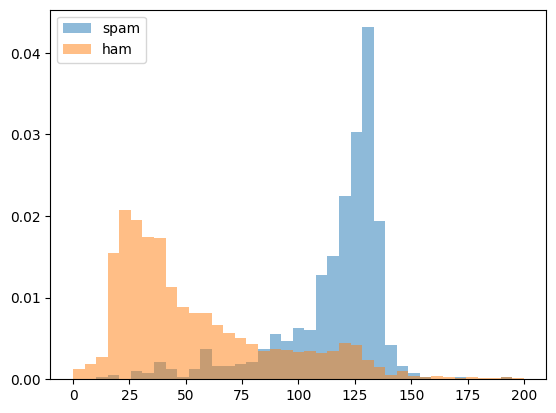

In [34]:
# Visualize distribution of message length
bins = np.linspace(0, 200, 40)

plt.hist(df2[df2['label']=='spam']['body_len'], bins, alpha=0.5, density=True, label='spam')
plt.hist(df2[df2['label']=='ham']['body_len'], bins, alpha=0.5, density=True, label='ham')
plt.legend(loc='upper left')
plt.show()

We can clearly see that Spams have a high number of words as compared to Hams.

So it’s a good feature.

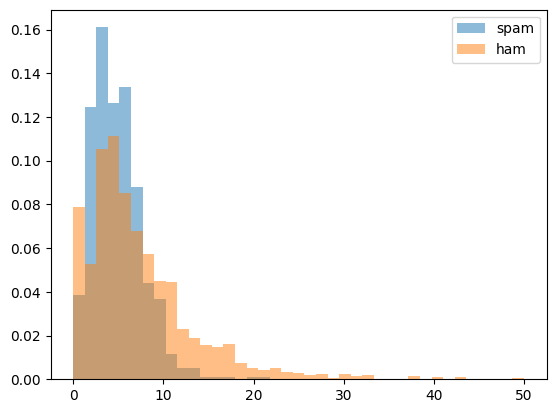

In [35]:
# Visualize distribution of punctuation percentage
bins = np.linspace(0, 50, 40)

plt.hist(df2[df2['label']=='spam']['punct%'], bins, alpha=0.5, density=True, label='spam')
plt.hist(df2[df2['label']=='ham']['punct%'], bins, alpha=0.5, density=True, label='ham')
plt.legend(loc='upper right')
plt.show()

Spam has a percentage of punctuations but not that far away from Ham.

Surprising as at times spam emails can contain a lot of punctuation marks.

But still, it may be a good feature.

### Train random forest model (using Bag of Words)

In [36]:
# Prepare data set for model training
bow_counts_df['label'] = df2['label']
bow_counts_df.head()

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham


In [37]:
# Separate independent and dependent variables
X = bow_counts_df.drop('label', axis=1)
y = bow_counts_df['label']

In [38]:
# Split data into training data (70%) and test data (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [39]:
# Instantiate random forest classifier model.  n = # of trees in the forest
rf = RandomForestClassifier(n_estimators=N_ESTIMATORS, random_state=RANDOM_STATE)

In [40]:
%%time

# Train random forest classifier model on training data
rf.fit(X_train, y_train);

CPU times: user 20.8 s, sys: 153 ms, total: 20.9 s
Wall time: 21.4 s


RandomForestClassifier(random_state=42)

In [41]:
# Make predictions for the test set
y_pred_test = rf.predict(X_test)

# View accuracy score
print(f"Accuracy using BoW: {round(accuracy_score(y_test, y_pred_test),3)}")

Accuracy using BoW: 0.976


### Train random forest model (using N-grams)

In [42]:
# Prepare data set for model training
ngram_counts_df['label'] = df2['label']
ngram_counts_df.head()

,008704050406 sp,0089mi last,0121 2025050,01223585236 xx,01223585334 cum,0125698789 ring,02 user,020603 2nd,0207 153,02072069400 bx,...,zoe hit,zogtoriu stare,zoom cine,zouk nichol,zyada kisi,üll finish,üll submit,üll take,〨ud even,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham


In [43]:
# Separate independent and dependent variables
X = ngram_counts_df.drop('label', axis=1)
y = ngram_counts_df['label']

In [44]:
# Split data into training data (70%) and test data (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [45]:
# Instantiate random forest classifier model.  n = # of trees in the forest
rf = RandomForestClassifier(n_estimators=N_ESTIMATORS, random_state=RANDOM_STATE)

In [46]:
%%time

# Train random forest classifier model on training data
rf.fit(X_train, y_train);

CPU times: user 2min 24s, sys: 985 ms, total: 2min 25s
Wall time: 2min 32s


RandomForestClassifier(random_state=42)

In [47]:
# Make predictions for the test set
y_pred_test = rf.predict(X_test)

# View accuracy score
#accuracy_score(y_test, y_pred_test)
print(f"Accuracy using N-grams: {round(accuracy_score(y_test, y_pred_test),3)}")

Accuracy using N-grams: 0.952


### Train random forest model (using TF-IDF)

In [48]:
# Prepare data set for model training
tfidf_counts_df['label'] = df2['label']
tfidf_counts_df.head()

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham


In [49]:
# Separate independent and dependent variables
X = tfidf_counts_df.drop('label', axis=1)
y = tfidf_counts_df['label']

In [50]:
# Split data into training data (70%) and test data (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [51]:
# Instantiate random forest classifier model.  n = # of trees in the forest
rf = RandomForestClassifier(n_estimators=N_ESTIMATORS, random_state=RANDOM_STATE)

In [52]:
%%time

# Train random forest classifier model on training data
rf.fit(X_train, y_train);

CPU times: user 20.3 s, sys: 115 ms, total: 20.4 s
Wall time: 20.6 s


RandomForestClassifier(random_state=42)

In [53]:
# Make predictions for the test set
y_pred_test = rf.predict(X_test)

# View accuracy score
#accuracy_score(y_test, y_pred_test)
print(f"Accuracy using TF-IDF: {round(accuracy_score(y_test, y_pred_test),3)}")

Accuracy using TF-IDF: 0.98
